In [128]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [129]:
np.random.seed(0)

In [130]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise= 0.1, factor= 0.2)

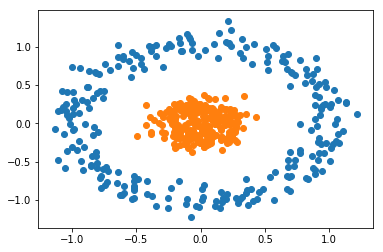

In [131]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [132]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])


In [133]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs = 100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 1s 3ms/step - loss: 0.6964 - acc: 0.5060
Epoch 2/100
500/500 [==============================] - 0s 122us/step - loss: 0.6938 - acc: 0.6180
Epoch 3/100
500/500 [==============================] - 0s 94us/step - loss: 0.6926 - acc: 0.5180
Epoch 4/100
500/500 [==============================] - 0s 103us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 105us/step - loss: 0.6905 - acc: 0.6340
Epoch 6/100
500/500 [==============================] - 0s 101us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 107us/step - loss: 0.6866 - acc: 0.6480
Epoch 8/100
500/500 [==============================] - 0s 106us/step - loss: 0.6839 - acc: 0.6700
Epoch 9/100
500/500 [==============================] - 0s 102us/step - loss: 0.6798 - acc: 0.7560
Epoch 10/100
500/500 [==============================] - 0s 104us/step - loss: 0.6736 - acc: 0.7960
Epoch 11/100
500/500 [

Text(0.5, 1.0, 'accuracy')

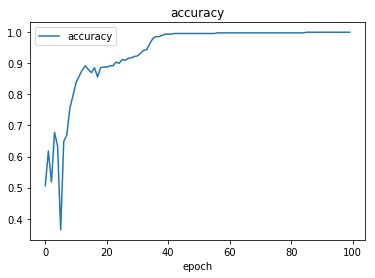

In [134]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

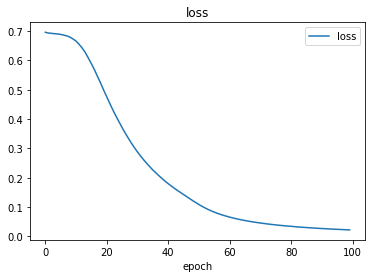

In [135]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [136]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) -0.25 , max(X[:, 0]) +0.25)
    y_span = np.linspace(min(X[:, 1]) -0.25 , max(X[:, 1]) +0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

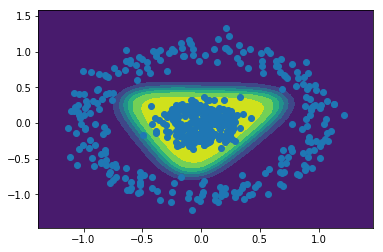

In [137]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

[[0.9911652]]


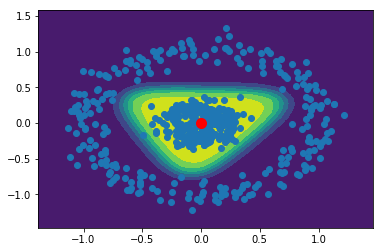

In [138]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0
y = 0
point=np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print(prediction)